# Redes de Hopfield

## Ejercicio 1

Implemente la arquitectura para una red recurrente de Hopfield con su entrenmiento hebbino y pruébela con los patrones que se meustran en la siguiente figura.

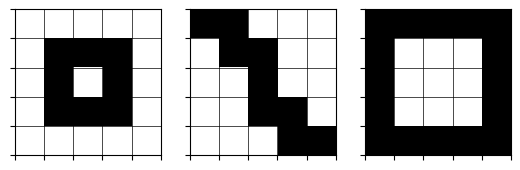

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def show_bitmap(vec, ax):
    vec = np.asarray(vec)
    N = int(np.sqrt(vec.size))

    img = vec.reshape(N, N)

    img = 1 - (img if img.max() <= 1 else img / img.max())

    # Force black/white rendering
    ax.set_xticks(np.arange(0, N+1, 1))
    ax.set_yticks(np.arange(0, N+1, 1))
    ax.set_aspect("equal")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(img, cmap='gray', vmin=0, vmax=1, interpolation='nearest', origin='upper', extent=[0, N, 0, N])
    ax.grid(which="both", color="black", linewidth=0.5)

x1 = np.array([
    0, 0, 0, 0, 0,
    0, 1, 1, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 1, 1, 0,
    0, 0, 0, 0, 0,
])
x2 = np.array([
    1, 1, 0, 0, 0,
    0, 1, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 1, 0,
    0, 0, 0, 1, 1,
])
x3 = np.array([
    1, 1, 1, 1, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 1,
])

fig, ax = plt.subplots(1,3)

show_bitmap(x1,ax[0])
show_bitmap(x2,ax[1])
show_bitmap(x3,ax[2])

In [8]:
import Hopfield

def noise(pattern: np.ndarray, rng, rate: float = 0.2) -> np.ndarray:
    noisy = pattern.copy()
    N = len(pattern)

    k = int(rate * N)
    idx = rng.choice(N, size=k, replace=False)
    noisy[idx] = np.where(noisy[idx] == 1, 0, 1)   # flip
    return noisy

# Almacenar patrones
hopfield = Hopfield.Hopfield()
hopfield.entrenar(np.array([x1,x2,x3]))

4
4
3


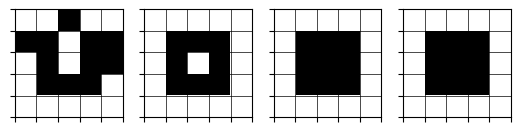

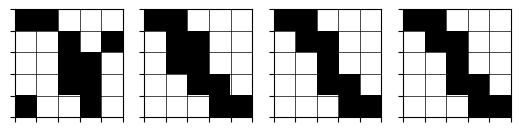

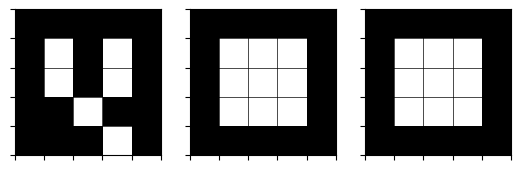

In [10]:
# RECUPERAR
rng = np.random.default_rng()
x = noise(x1, rng)
y = hopfield.recuperar(x)
print(len(y))

fig, ax = plt.subplots(1,len(y))
for i in range(len(y)):
    show_bitmap(y[i], ax[i])

x = noise(x2, rng)
y = hopfield.recuperar(x)
print(len(y))

fig, ax = plt.subplots(1,len(y))
for i in range(len(y)):
    show_bitmap(y[i], ax[i])

x = noise(x3, rng)
y = hopfield.recuperar(x)
print(len(y))

fig, ax = plt.subplots(1,len(y))
for i in range(len(y)):
    show_bitmap(y[i], ax[i])